# 画像データの機械学習

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

%matplotlib inline
pd.options.display.max_columns = None

In [3]:
digits = datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits['data'].shape

(1797, 64)

In [6]:
temp = digits['data'][0]
# 8x8にreshape
temp = temp.reshape(8,8)
temp

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

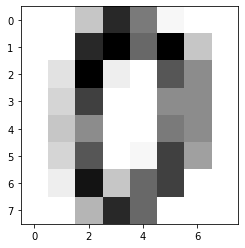

In [7]:
# 画像化
plt.imshow(temp, cmap='Greys')

In [8]:
# 対応する目的変数を確認
digits['target'][0]

0

In [9]:
Y = np.array(digits['target'])
X = np.array(digits['data'])

In [10]:
print(Y.shape)
print(X.shape)

(1797,)
(1797, 64)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [13]:
normal_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=3000)
normal_model.fit(X_train, Y_train)
Y_pred = normal_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.90      0.97      0.94        38
           2       1.00      1.00      1.00        32
           3       0.95      1.00      0.97        36
           4       0.95      0.98      0.96        53
           5       1.00      0.93      0.97        45
           6       0.97      0.97      0.97        33
           7       1.00      1.00      1.00        40
           8       0.90      0.84      0.87        31
           9       1.00      0.94      0.97        35

    accuracy                           0.97       378
   macro avg       0.97      0.96      0.96       378
weighted avg       0.97      0.97      0.97       378



In [14]:
# テストデータによる評価
Y_pred = normal_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.96      0.93        52
           2       0.98      0.94      0.96        53
           3       0.95      0.96      0.95        54
           4       0.96      0.98      0.97        48
           5       0.98      0.95      0.96        57
           6       0.95      0.98      0.97        60
           7       0.98      0.94      0.96        53
           8       0.95      0.89      0.92        61
           9       0.93      0.96      0.95        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [15]:
# 学習後のパラメータを取得
coefs = normal_model.coef_

coefs.shape

(10, 64)

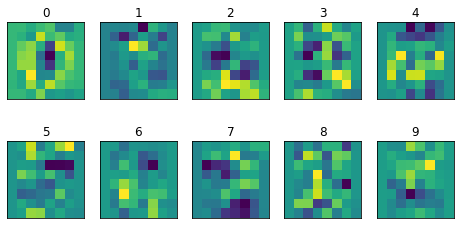

In [16]:
# パラメータ(coef_)を画像として出力

# 2行5列にグラフを分割
fig, ax = plt.subplots(2, 5, figsize=(8, 4))

for i in range(2):
    for j in range(5):
        # zは左上から数えたグラフの描画位置
        z = i * 5 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(coefs[z].reshape(8,8), cmap='viridis')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

        # タイトルに数値を
        ax[i, j].set_title(z)

plt.show()

# 主成分分析(PCA)

In [17]:
from sklearn.decomposition import PCA

In [18]:
# 64個の説明変数を8個に主成分分析
pca = PCA(n_components=8).fit(X)

In [19]:
# 主成分分析した結果を基にデータ変換を行い成分を取得
X2 = pca.fit_transform(X)

In [39]:
print("X: ", X.shape)
print("X2:", X2.shape)

X:  (1797, 64)
X2: (1797, 8)


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [41]:
pca_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=3000)
pca_model.fit(X_train, Y_train)
Y_pred = pca_model.predict(X_valid)

# モデルの評価
print(classification_report(Y_valid, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.80      0.87      0.84        38
           2       1.00      1.00      1.00        32
           3       0.79      0.75      0.77        36
           4       0.94      0.92      0.93        53
           5       0.95      0.91      0.93        45
           6       1.00      0.97      0.98        33
           7       0.95      1.00      0.98        40
           8       0.77      0.65      0.70        31
           9       0.72      0.80      0.76        35

    accuracy                           0.89       378
   macro avg       0.89      0.89      0.89       378
weighted avg       0.89      0.89      0.89       378



In [23]:
# テストデータによる評価
Y_pred = pca_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.85      0.90      0.88        52
           2       0.98      0.92      0.95        53
           3       0.83      0.83      0.83        54
           4       0.89      0.98      0.93        48
           5       0.91      0.86      0.88        57
           6       0.97      0.98      0.98        60
           7       0.92      0.91      0.91        53
           8       0.77      0.70      0.74        61
           9       0.75      0.77      0.76        57

    accuracy                           0.88       540
   macro avg       0.88      0.89      0.88       540
weighted avg       0.88      0.88      0.88       540



## モデルの考察

In [24]:
# PCAのパラメータを取得
comps= pca.components_

comps.shape

(8, 64)

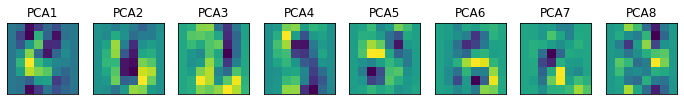

In [42]:
fig, ax = plt.subplots(1, 8, figsize=(12, 3))

for i in range(8):
    ax[i].imshow(comps[i].reshape(8,8), cmap='viridis')
    ax[i].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax[i].set_title(f"PCA{i+1}")

plt.show()

In [26]:
# 学習後のパラメータを取得
coefs = pca_model.coef_

coefs.shape

(10, 8)

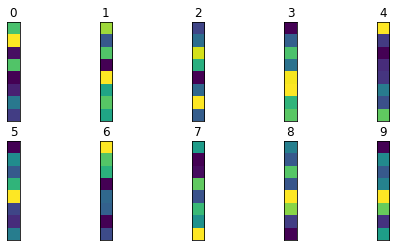

In [27]:
# パラメータ(coef_)を画像として出力

# 2行5列にグラフを分割
fig, ax = plt.subplots(2, 5, figsize=(8, 4))

for i in range(2):
    for j in range(5):
        # zは左上から数えたグラフの描画位置
        z = i * 5 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(coefs[z].reshape(8, 1), cmap='viridis')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

        # タイトルに数値を
        ax[i, j].set_title(z)

plt.show()

# クラスタリングによる分類

In [28]:
from sklearn.cluster import KMeans

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [30]:
kmeans_model = KMeans(n_clusters=10, init='k-means++', n_init=30, random_state=0)
kmeans_model.fit(X_train)

KMeans(n_clusters=10, n_init=30, random_state=0)

In [31]:
# クラスタ番号を取得
Y_pred = kmeans_model.predict(X_train)
Y_pred

array([2, 3, 4, ..., 2, 2, 7], dtype=int32)

In [32]:
# クラスタ番号を数値に変換する表の作成
import collections

corr_table = []

for i in range(10):
    # クラスタ番号i番目のY_trainを取得
    count = collections.Counter(Y_train[Y_pred == i])
    # Y_trainの中で多数決で数値を決める
    print(count.most_common())
    corr_table.append(count.most_common()[0][0])

[(2, 102), (1, 14), (8, 3)]
[(0, 131), (6, 1)]
[(7, 118), (9, 7), (3, 6), (4, 6), (2, 1), (8, 1)]
[(3, 112), (9, 95), (5, 28), (2, 7), (8, 3), (1, 1)]
[(6, 117), (1, 2), (8, 1)]
[(4, 122), (5, 3), (0, 2)]
[(1, 32), (9, 17), (7, 7), (8, 6), (4, 2)]
[(8, 88), (2, 14), (3, 8), (9, 2), (6, 1), (4, 1), (7, 1)]
[(1, 81), (8, 8), (6, 2), (4, 2)]
[(5, 94), (3, 3), (8, 3), (9, 2)]


In [33]:
# 同じ数値が重複した場合は、2位の数値を設定
corr_table[9] = 9
corr_table

[2, 0, 7, 3, 6, 4, 1, 8, 1, 9]

In [34]:
# クラスタ番号を数値に変換
Y_pred2 = []
for i in Y_pred:
    Y_pred2.append(corr_table[i])

# モデルの評価
print(classification_report(Y_train, Y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       133
           1       0.72      0.87      0.79       130
           2       0.86      0.82      0.84       124
           3       0.46      0.87      0.60       129
           4       0.96      0.92      0.94       133
           5       0.00      0.00      0.00       125
           6       0.97      0.97      0.97       121
           7       0.85      0.94      0.89       126
           8       0.77      0.78      0.77       113
           9       0.02      0.02      0.02       123

    accuracy                           0.72      1257
   macro avg       0.66      0.72      0.68      1257
weighted avg       0.66      0.72      0.68      1257

